# FRAUD DETECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [9]:
import sys
sys.path.append('../')

data_name = ['creditcard','Fraud_Data','IpAddress_to_Country']
data = {}
for name in data_name:
    data[name] = pd.read_csv(f'../docs/{name}.csv')


In [10]:
data[data_name[1]].head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [11]:
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000
pd.options.display.max_rows = 400000

In [12]:
from scripts.analysis import *
info(data[data_name[1]])

Summary Statistics:
              user_id  purchase_value            age    ip_address          class
count  151112.000000   151112.000000  151112.000000  1.511120e+05  151112.000000
mean   200171.040970       36.935372      33.140704  2.152145e+09       0.093646
std    115369.285024       18.322762       8.617733  1.248497e+09       0.291336
min         2.000000        9.000000      18.000000  5.209350e+04       0.000000
25%    100642.500000       22.000000      27.000000  1.085934e+09       0.000000
50%    199958.000000       35.000000      33.000000  2.154770e+09       0.000000
75%    300054.000000       49.000000      39.000000  3.243258e+09       0.000000
max    400000.000000      154.000000      76.000000  4.294850e+09       1.000000
Variance:
 user_id           1.331007e+10
purchase_value    3.357236e+02
age               7.426533e+01
ip_address        1.558745e+18
class             8.487680e-02
dtype: float64
Standard Deviation:
 user_id           1.153693e+05
purchase_value   

In [13]:
check_missing(data[data_name[0]])


Missing Values:
 Series([], dtype: int64)


In [14]:
data[data_name[1]].columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [15]:
for name in data_name:
    data[name] = data[name].drop_duplicates()

data[data_name[1]]['signup_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])
data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])

data[data_name[0]]['Time'] = pd.to_datetime(data[data_name[0]]['Time'])

data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])
data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])


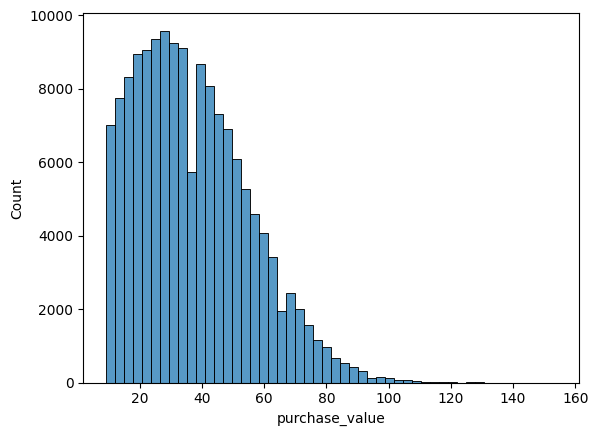

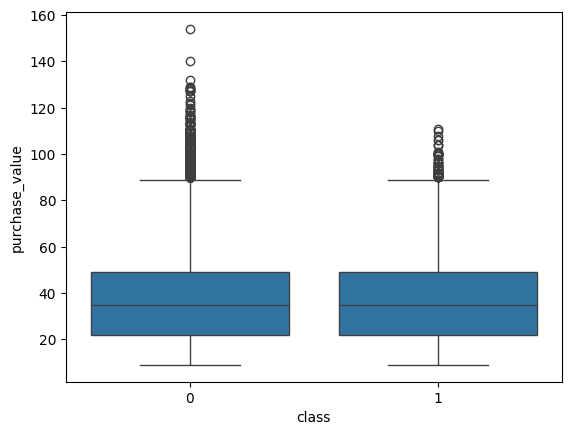

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis
sns.histplot(data[data_name[1]]['purchase_value'], bins=50)
plt.show()

# Bivariate analysis
sns.boxplot(x='class', y='purchase_value', data=data[data_name[1]])
plt.show()


In [11]:
data[data_name[2]]['upper_bound_ip_address'].head()

0    16777471
1    16777727
2    16778239
3    16779263
4    16781311
Name: upper_bound_ip_address, dtype: int64

In [12]:
import ipaddress

def convert_ip_to_int(ip):
    if isinstance(ip, (int, float)):  # Check if the value is already an int or float
        return int(ip)  # Convert float to int if needed
    try:
        return int(ipaddress.IPv4Address(ip))
    except ( ValueError):
        return None  # or -1 or any placeholder for invalid IPs

# Convert IP addresses to integer format with error handling
data[data_name[1]]['ip_address'] = data[data_name[1]]['ip_address'].apply(convert_ip_to_int)
data[data_name[2]]['lower_bound_ip_address'] = data[data_name[2]]['lower_bound_ip_address'].apply(convert_ip_to_int)
data[data_name[2]]['upper_bound_ip_address'] = data[data_name[2]]['upper_bound_ip_address'].apply(convert_ip_to_int)


In [13]:
data[data_name[1]].head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-07-21 07:09:52,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0


In [ ]:
merged_results = []

for _, bounds_row in data[data_name[2]].iterrows():
    lower_bound = bounds_row['lower_bound_ip_address']
    upper_bound = bounds_row['upper_bound_ip_address']
    
    filtered_ips = data[data_name[1]][
        (data[data_name[1]]['ip_address'] >= lower_bound) & 
        (data[data_name[1]]['ip_address'] <= upper_bound)
    ]
    
    merged_results.append(filtered_ips)

merged = pd.concat(merged_results, ignore_index=True)

merged.drop_duplicates(inplace=True)


In [ ]:
merged.to_csv('Merged_Fraud_Data.csv', index=False)

In [51]:
merged_data = pd.read_csv('../docs/Merged_Fraud_Data.csv')
merged_data.count()

user_id                   129146
signup_time               129146
purchase_time             129146
purchase_value            129146
device_id                 129146
source                    129146
browser                   129146
sex                       129146
age                       129146
ip_address                129146
class                     129146
lower_bound_ip_address    129146
upper_bound_ip_address    129146
country                   129146
dtype: int64

In [52]:
merged_data['signup_time'] = pd.to_datetime(merged_data['signup_time'])
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

merged_data['transaction_count'] = merged_data.groupby('device_id')['purchase_time'].transform('count')

merged_data = merged_data.sort_values(['device_id', 'purchase_time']) 
merged_data['time_since_last_purchase'] = merged_data.groupby('device_id')['purchase_time'].diff().dt.total_seconds()

merged_data['time_since_last_purchase'] = merged_data['time_since_last_purchase'].fillna(0)

print(merged_data[['device_id', 'purchase_time', 'transaction_count', 'time_since_last_purchase']].head())


           device_id       purchase_time  transaction_count  \
29358  AAALBGNHHVMKG 2015-06-13 23:42:18                  1   
49251  AAAWIHVCQELTP 2015-03-29 00:39:07                  1   
59069  AAAXXOZJRZRAO 2015-01-01 04:25:23                 11   
30654  AAAXXOZJRZRAO 2015-01-01 04:25:24                 11   
98558  AAAXXOZJRZRAO 2015-01-01 04:25:25                 11   

       time_since_last_purchase  
29358                       0.0  
49251                       0.0  
59069                       0.0  
30654                       1.0  
98558                       1.0  


In [53]:
merged_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'transaction_count', 'time_since_last_purchase'],
      dtype='object')

>> ### Univariate Analysis

             user_id                    signup_time  \
count  129146.000000                         129146   
mean   200130.920416  2015-04-19 20:20:01.988253440   
min         2.000000            2015-01-01 00:00:42   
25%    100603.250000            2015-02-18 02:07:27   
50%    199971.500000            2015-04-18 21:04:32   
75%    299994.750000  2015-06-18 11:50:54.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115358.923526                            NaN   

                       purchase_time  purchase_value            age  \
count                         129146   129146.000000  129146.000000   
mean   2015-06-15 21:00:52.277546496       36.932456      33.128413   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%    2015-04-18 05:24:26.249999872       22.000000      27.000000   
50%              2015-06-18 08:10:14       35.000000      33.000000   
75%       2015-08-17 16:25:27.500000       49.000000      39.000000   
max    

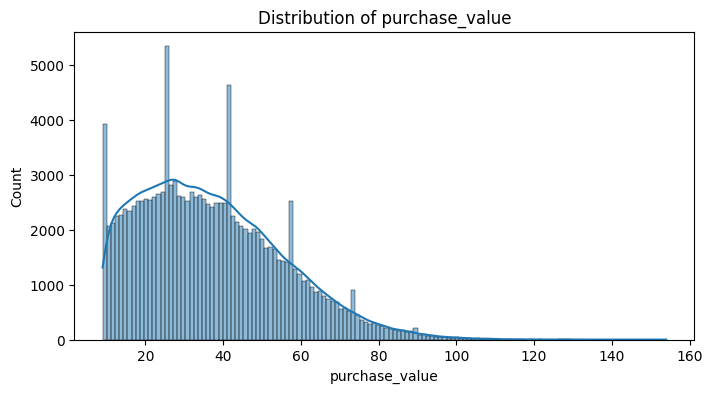

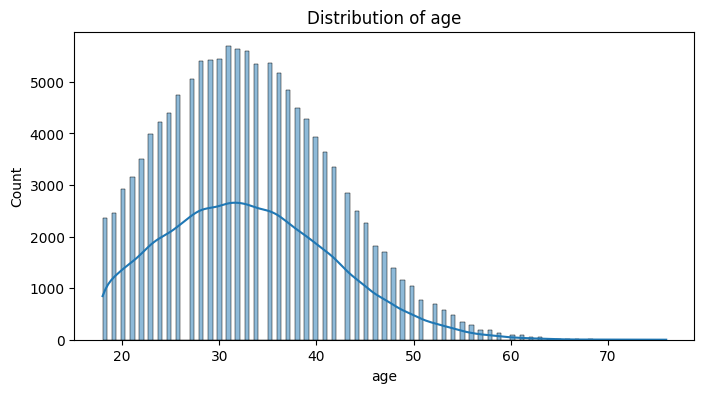

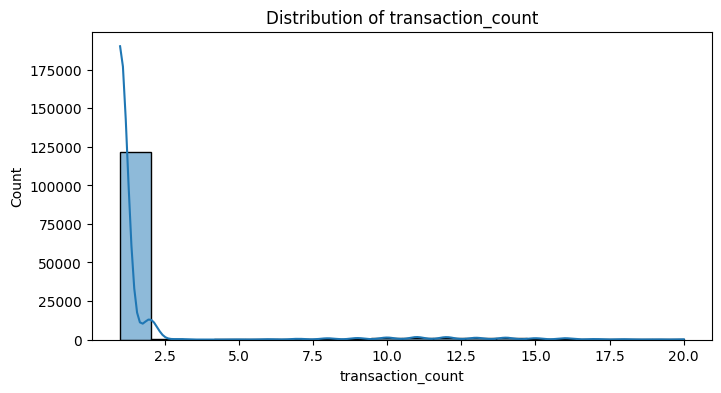

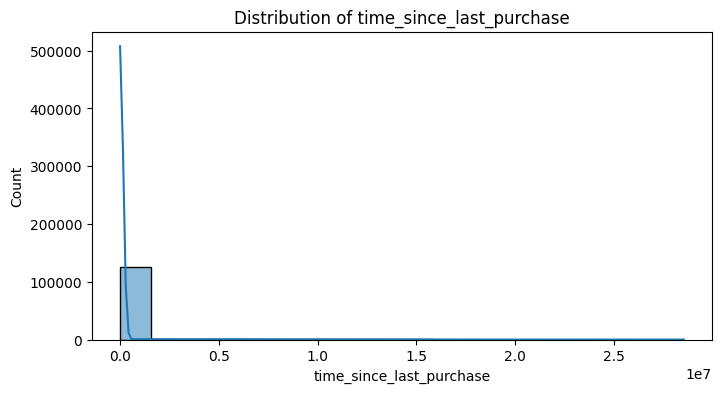

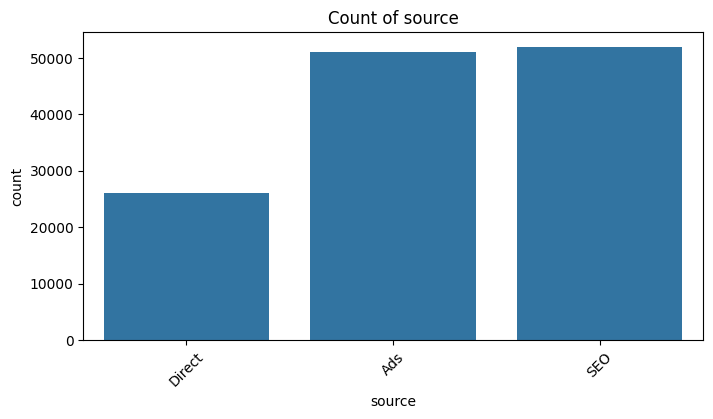

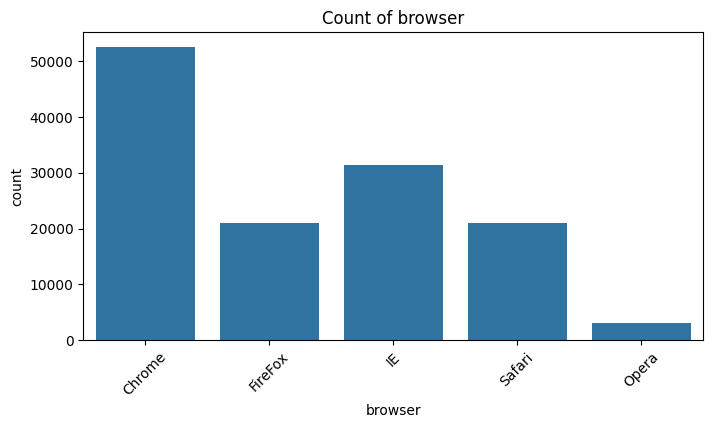

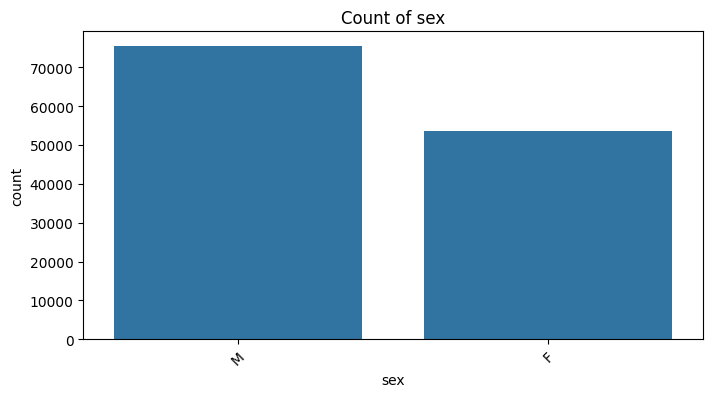

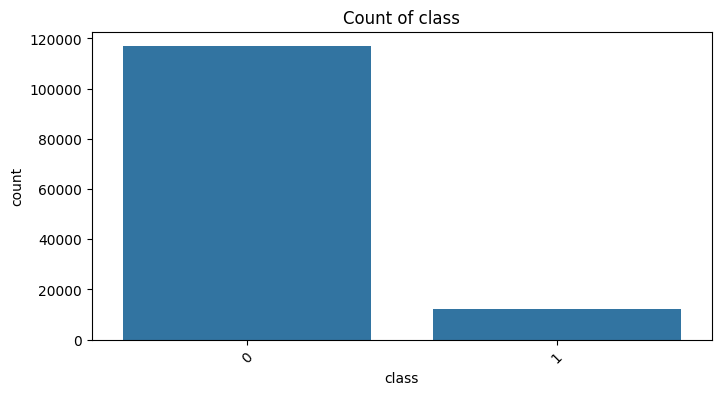

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
print(merged_data.describe())

# Summary statistics for categorical columns
print(merged_data[['source', 'browser', 'sex', 'country', 'device_id','class']].describe())

# Plotting univariate distributions for numerical features
numerical_columns = ['purchase_value', 'age', 'transaction_count', 'time_since_last_purchase']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar plots for categorical features
categorical_columns = ['source', 'browser', 'sex', 'class']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=merged_data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


>> ### Bivariate Analysis

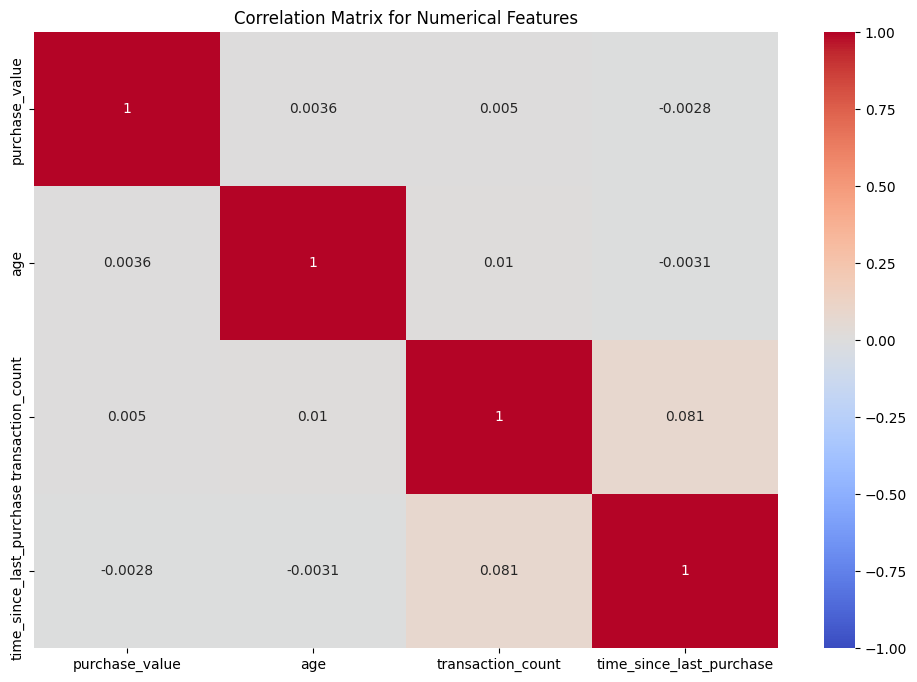

In [55]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data[numerical_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


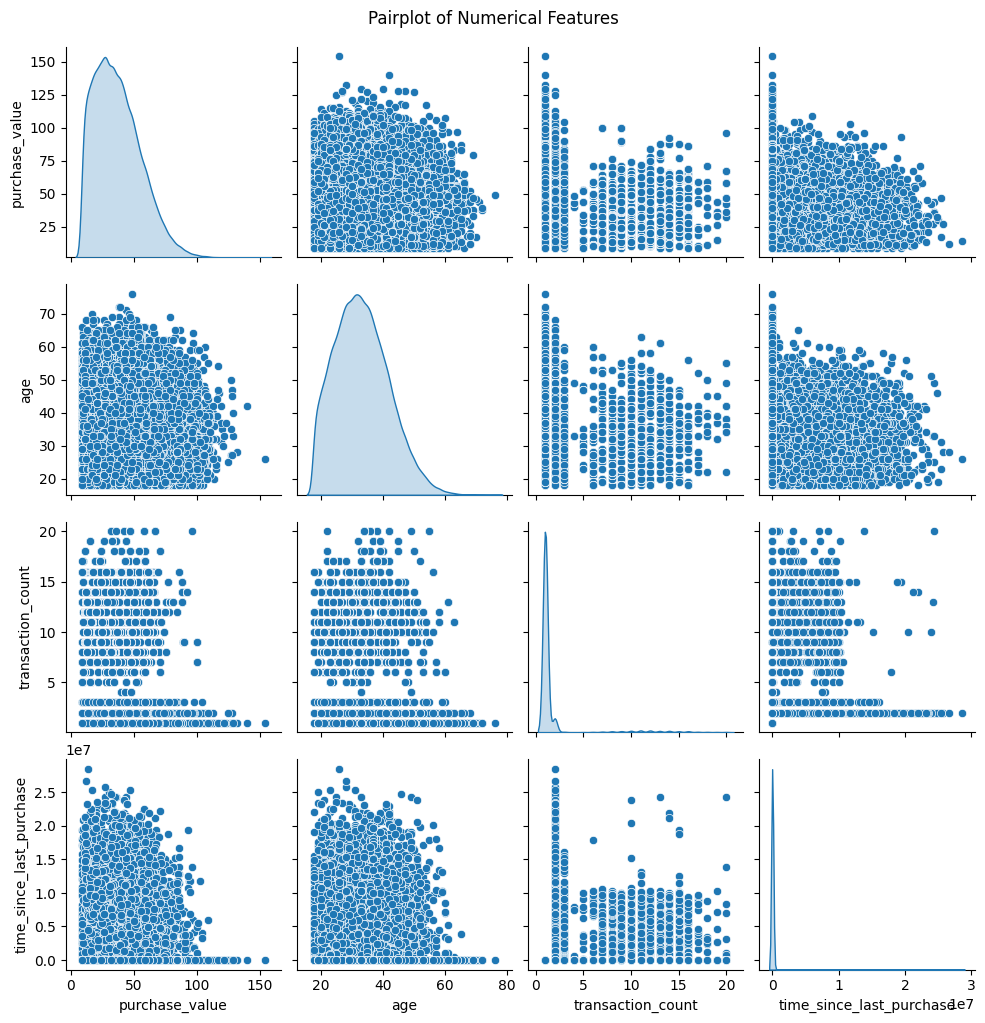

In [56]:
# Scatter plot for numerical features
sns.pairplot(merged_data[numerical_columns], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


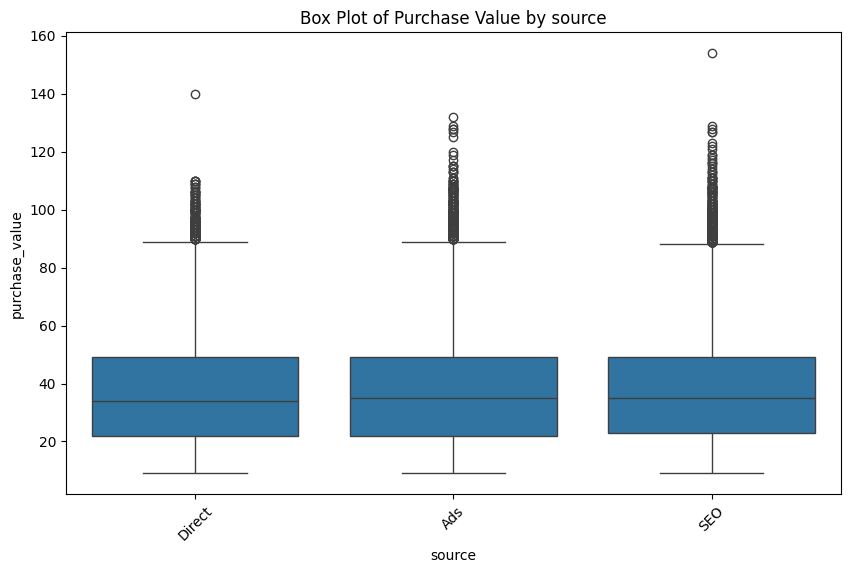

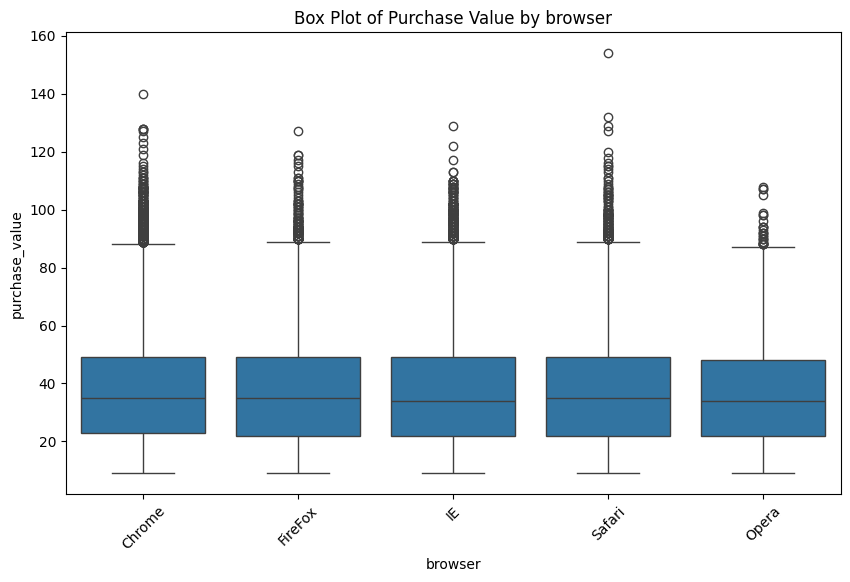

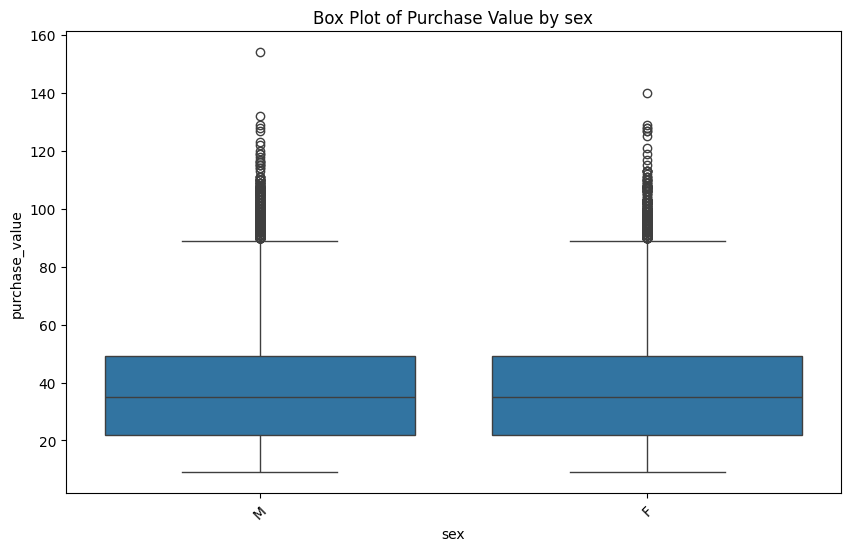

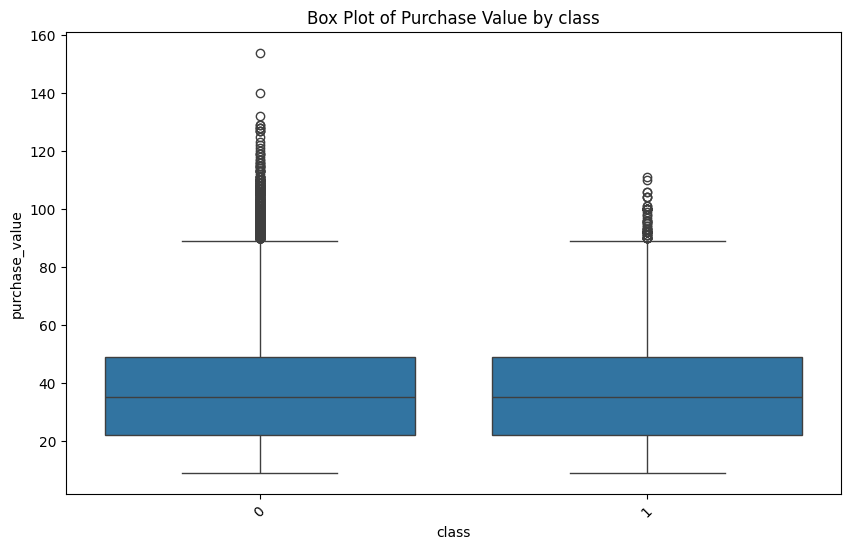

In [57]:
# Box plots for categorical vs numerical
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='purchase_value', data=merged_data)
    plt.title(f'Box Plot of Purchase Value by {col}')
    plt.xticks(rotation=45)
    plt.show()


>> ### Treat Outliers 

In [58]:
for col in merged_data.columns:
    print(f'{col} {merged_data[col].dtype}')

user_id int64
signup_time datetime64[ns]
purchase_time datetime64[ns]
purchase_value int64
device_id object
source object
browser object
sex object
age int64
ip_address int64
class int64
lower_bound_ip_address int64
upper_bound_ip_address int64
country object
transaction_count int64
time_since_last_purchase float64


In [59]:
import numpy as np

def remove_outliers_iqr(df, columns):
    for col in columns:
        if df[col].dtype.kind in 'bifc':  # Only process numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            print(f"Processing column: {col}")
            print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

            # Drop outliers
            before_rows = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_rows = df.shape[0]
            
            print(f"Removed {before_rows - after_rows} outliers from {col}")

        else:
            print(f"Skipping column: {col} (not numeric)")

    return df

columns_to_check = ['purchase_value', 'age', 'transaction_count', 'time_since_last_purchase','ip_address',
                    'lower_bound_ip_address','upper_bound_ip_address','time_since_last_purchase']

merged_data = remove_outliers_iqr(merged_data, columns_to_check)

Processing column: purchase_value
Lower bound: -18.5, Upper bound: 89.5
Removed 909 outliers from purchase_value
Processing column: age
Lower bound: 9.0, Upper bound: 57.0
Removed 668 outliers from age
Processing column: transaction_count
Lower bound: 1.0, Upper bound: 1.0
Removed 15146 outliers from transaction_count
Processing column: time_since_last_purchase
Lower bound: 0.0, Upper bound: 0.0
Removed 0 outliers from time_since_last_purchase
Processing column: ip_address
Lower bound: -1863098870.75, Upper bound: 5646835451.25
Removed 0 outliers from ip_address
Processing column: lower_bound_ip_address
Lower bound: -1897037824.0, Upper bound: 5667127296.0
Removed 0 outliers from lower_bound_ip_address
Processing column: upper_bound_ip_address
Lower bound: -1855193089.0, Upper bound: 5642125311.0
Removed 0 outliers from upper_bound_ip_address
Processing column: time_since_last_purchase
Lower bound: 0.0, Upper bound: 0.0
Removed 0 outliers from time_since_last_purchase


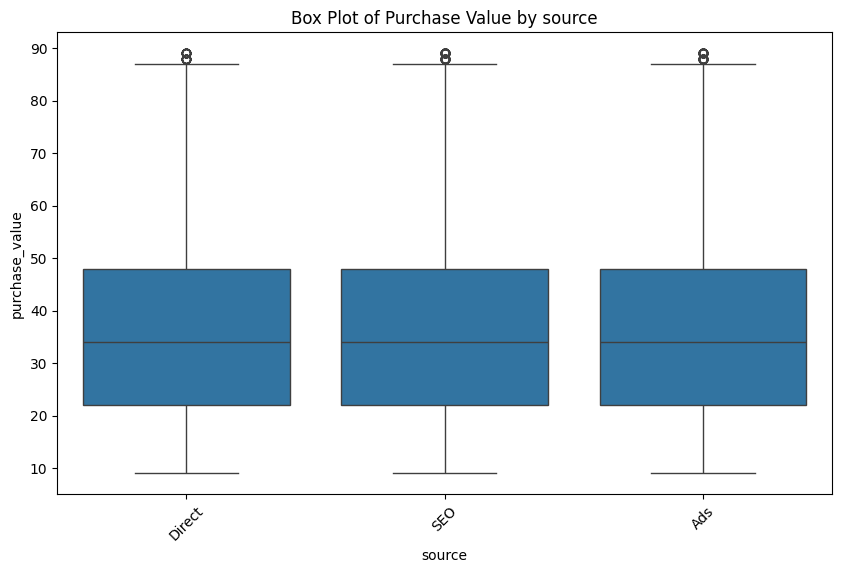

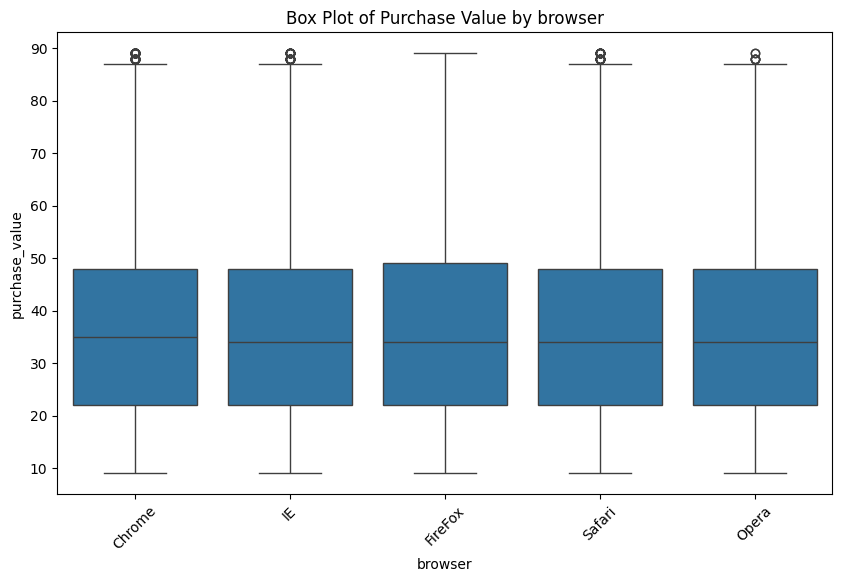

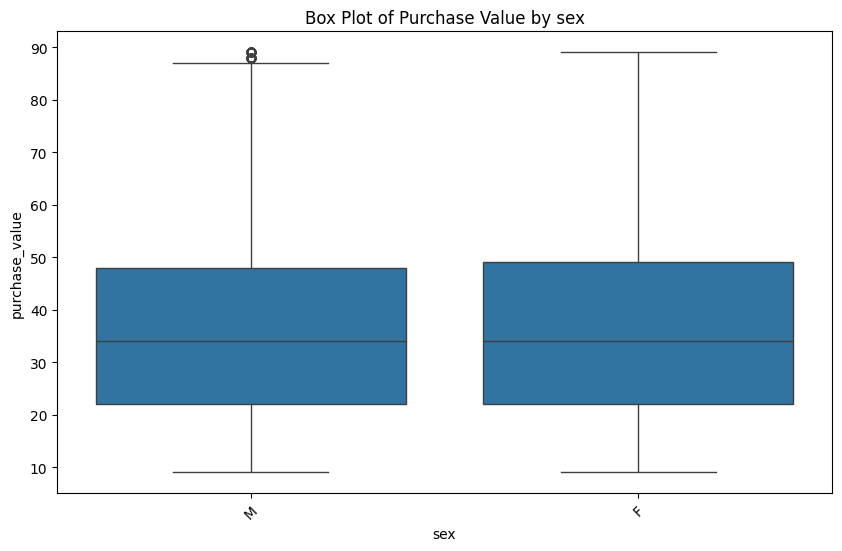

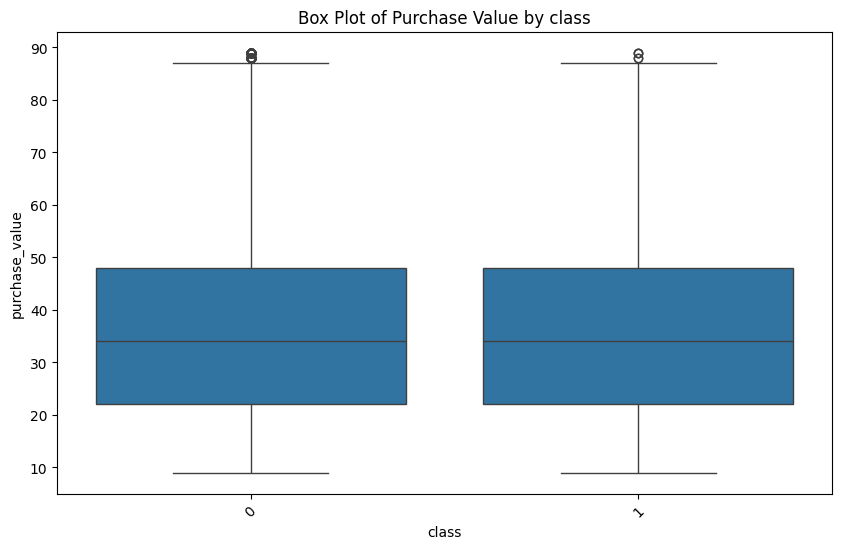

In [60]:
# Box plots for categorical vs numerical
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='purchase_value', data=merged_data)
    plt.title(f'Box Plot of Purchase Value by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [61]:
merged_data['device_id'].nunique()

112423

In [62]:
merged_data[merged_data['transaction_count']>=0].count()

user_id                     112423
signup_time                 112423
purchase_time               112423
purchase_value              112423
device_id                   112423
source                      112423
browser                     112423
sex                         112423
age                         112423
ip_address                  112423
class                       112423
lower_bound_ip_address      112423
upper_bound_ip_address      112423
country                     112423
transaction_count           112423
time_since_last_purchase    112423
dtype: int64

In [63]:
merged = merged_data.sort_values(by=['device_id', 'purchase_time'])

merged['transaction_frequency'] = merged.groupby('user_id')['purchase_time'].transform('count')

merged['prev_purchase_time'] = merged.groupby('user_id')['purchase_time'].shift(1)
merged['transaction_velocity'] = (merged['purchase_time'] - merged['prev_purchase_time']).dt.total_seconds().fillna(0)


In [64]:
merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,time_since_last_purchase,transaction_frequency,prev_purchase_time,transaction_velocity
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,0,2494562304,2494627839,United Kingdom,1,0.0,1,NaT,0.0
79101,10086,2015-01-02 17:00:43,2015-03-07 20:42:27,21,AABJEESQPJHDQ,SEO,Chrome,M,33,1570352242,0,1570340864,1570373631,Russian Federation,1,0.0,1,NaT,0.0
1779,131014,2015-07-22 20:31:00,2015-08-31 06:30:11,51,AABNLBQBKMWRG,Ads,IE,F,32,821897482,0,805306368,822083583,United States,1,0.0,1,NaT,0.0
109507,288150,2015-06-20 21:05:54,2015-10-11 08:48:43,53,AABOMYDURXEQT,Ads,IE,M,40,2832496843,0,2832465920,2832531455,United States,1,0.0,1,NaT,0.0
103123,90244,2015-03-27 18:49:34,2015-05-11 14:03:40,45,AABOOVEJUXMKC,Direct,IE,M,20,3525232083,0,3525050368,3525312511,China,1,0.0,1,NaT,0.0


In [65]:
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour

merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

print(merged_data[['purchase_time', 'hour_of_day', 'day_of_week']].head())


             purchase_time  hour_of_day  day_of_week
29358  2015-06-13 23:42:18           23            5
79101  2015-03-07 20:42:27           20            5
1779   2015-08-31 06:30:11            6            0
109507 2015-10-11 08:48:43            8            6
103123 2015-05-11 14:03:40           14            0


In [66]:
merged_data['time_diff'] = (merged_data['purchase_time'] - merged_data['signup_time']).dt.total_seconds()

merged_data['transaction_count'] = merged_data.groupby('user_id')['purchase_value'].transform('count')
merged_data['velocity'] = merged_data['purchase_value'] / merged_data['time_diff']


In [67]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,time_since_last_purchase,hour_of_day,day_of_week,time_diff,velocity
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,0,2494562304,2494627839,United Kingdom,1,0.0,23,5,2792507.0,0.000016
79101,10086,2015-01-02 17:00:43,2015-03-07 20:42:27,21,AABJEESQPJHDQ,SEO,Chrome,M,33,1570352242,0,1570340864,1570373631,Russian Federation,1,0.0,20,5,5542904.0,0.000004
1779,131014,2015-07-22 20:31:00,2015-08-31 06:30:11,51,AABNLBQBKMWRG,Ads,IE,F,32,821897482,0,805306368,822083583,United States,1,0.0,6,0,3405551.0,0.000015
109507,288150,2015-06-20 21:05:54,2015-10-11 08:48:43,53,AABOMYDURXEQT,Ads,IE,M,40,2832496843,0,2832465920,2832531455,United States,1,0.0,8,6,9718969.0,0.000005
103123,90244,2015-03-27 18:49:34,2015-05-11 14:03:40,45,AABOOVEJUXMKC,Direct,IE,M,20,3525232083,0,3525050368,3525312511,China,1,0.0,14,0,3870846.0,0.000012


In [68]:
merged_data['day_of_week'].unique()

array([5, 0, 6, 1, 4, 3, 2], dtype=int32)

>> ## Handle Cyclical data

In [69]:
import numpy as np
import pandas as pd

# Cyclical encoding hour
merged_data['hour_sin'] = np.sin(2 * np.pi * merged_data['hour_of_day'] / 23)
merged_data['hour_cos'] = np.cos(2 * np.pi * merged_data['hour_of_day'] / 23)

# Cyclical encoding day
merged_data['day_sin'] = np.sin(2 * np.pi * merged_data['day_of_week'] / 6)
merged_data['day_cos'] = np.cos(2 * np.pi * merged_data['day_of_week'] / 6)



merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,transaction_count,time_since_last_purchase,hour_of_day,day_of_week,time_diff,velocity,hour_sin,hour_cos,day_sin,day_cos
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,...,1,0.0,23,5,2792507.0,0.000016,-2.449294e-16,1.000000,-8.660254e-01,0.5
79101,10086,2015-01-02 17:00:43,2015-03-07 20:42:27,21,AABJEESQPJHDQ,SEO,Chrome,M,33,1570352242,...,1,0.0,20,5,5542904.0,0.000004,-7.308360e-01,0.682553,-8.660254e-01,0.5
1779,131014,2015-07-22 20:31:00,2015-08-31 06:30:11,51,AABNLBQBKMWRG,Ads,IE,F,32,821897482,...,1,0.0,6,0,3405551.0,0.000015,9.976688e-01,-0.068242,0.000000e+00,1.0
109507,288150,2015-06-20 21:05:54,2015-10-11 08:48:43,53,AABOMYDURXEQT,Ads,IE,M,40,2832496843,...,1,0.0,8,6,9718969.0,0.000005,8.169699e-01,-0.576680,-2.449294e-16,1.0
103123,90244,2015-03-27 18:49:34,2015-05-11 14:03:40,45,AABOOVEJUXMKC,Direct,IE,M,20,3525232083,...,1,0.0,14,0,3870846.0,0.000012,-6.310879e-01,-0.775711,0.000000e+00,1.0


In [70]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
columns_to_scale = ['purchase_value', 'age', 'transaction_count', 'time_since_last_purchase', 
                    'time_diff', 'velocity', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos']

# Initialize the StandardScaler
scaler = StandardScaler()
merged_data_scaled = merged_data
# Apply StandardScaler to the selected columns
merged_data_scaled[columns_to_scale] = scaler.fit_transform(merged_data[columns_to_scale])


In [71]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to normalize
columns_to_normalize = ['purchase_value', 'age', 'transaction_count', 'time_since_last_purchase', 
                        'time_diff', 'velocity', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos']

# Initialize the MinMaxScaler
normalizer = MinMaxScaler()

merged_data_normalized = merged_data
# Apply MinMaxScaler to the selected columns
merged_data[columns_to_normalize] = normalizer.fit_transform(merged_data[columns_to_normalize])


In [72]:
merged_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'transaction_count', 'time_since_last_purchase', 'hour_of_day',
       'day_of_week', 'time_diff', 'velocity', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos'],
      dtype='object')

In [73]:
for col in merged_data.columns:
    print(f'{col}: has {merged_data_scaled[col].nunique()} unique values\n')

user_id: has 112423 unique values

signup_time: has 112423 unique values

purchase_time: has 112160 unique values

purchase_value: has 81 unique values

device_id: has 112423 unique values

source: has 3 unique values

browser: has 5 unique values

sex: has 2 unique values

age: has 40 unique values

ip_address: has 112422 unique values

class: has 2 unique values

lower_bound_ip_address: has 24781 unique values

upper_bound_ip_address: has 24781 unique values

country: has 179 unique values

transaction_count: has 1 unique values

time_since_last_purchase: has 1 unique values

hour_of_day: has 24 unique values

day_of_week: has 7 unique values

time_diff: has 112423 unique values

velocity: has 112382 unique values

hour_sin: has 24 unique values

hour_cos: has 18 unique values

day_sin: has 6 unique values

day_cos: has 5 unique values



In [74]:
from sklearn.preprocessing import  LabelEncoder

# Step 1: Handle categorical features with One-Hot Encoding
categorical_features = ['source', 'browser']
merged_data_scaled = pd.get_dummies(merged_data_scaled, columns=categorical_features, drop_first=True)
merged_data_normalized = pd.get_dummies(merged_data_normalized, columns=categorical_features, drop_first=True)


# Step 2: Handle categorical features feature with Label Encoding
label_encoding_columns = ['user_id','sex','device_id', 'ip_address', 'country']
label_encoder = LabelEncoder()
for column in label_encoding_columns:
    merged_data_scaled[column] = label_encoder.fit_transform(merged_data_scaled[column])
    merged_data_normalized[column] = label_encoder.fit_transform(merged_data_normalized[column])



merged_data_scaled.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,lower_bound_ip_address,...,hour_sin,hour_cos,day_sin,day_cos,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
29358,63697,2015-05-12 16:00:31,2015-06-13 23:42:18,0.450,0,1,0.410256,74538,0,2494562304,...,0.500000,1.000000,0.0,0.75,True,False,False,False,False,False
79101,2805,2015-01-02 17:00:43,2015-03-07 20:42:27,0.150,1,1,0.384615,47230,0,1570340864,...,0.133728,0.840534,0.0,0.75,False,True,False,False,False,False
1779,36778,2015-07-22 20:31:00,2015-08-31 06:30:11,0.525,2,0,0.358974,24477,0,805306368,...,1.000000,0.463380,0.5,1.00,False,False,False,True,False,False
109507,81016,2015-06-20 21:05:54,2015-10-11 08:48:43,0.550,3,1,0.564103,84350,0,2832465920,...,0.909439,0.207971,0.5,1.00,False,False,False,True,False,False
103123,25151,2015-03-27 18:49:34,2015-05-11 14:03:40,0.450,4,1,0.051282,104941,0,3525050368,...,0.183719,0.107990,0.5,1.00,True,False,False,True,False,False


In [75]:
merged_data_scaled.to_csv('../docs/encoded_data_scaled.csv')
merged_data_normalized.to_csv('../docs/encoded_data_normalized.csv')

In [76]:
encoded_data_scaled = pd.read_csv('../docs/encoded_data_scaled.csv')
encoded_data_normalized = pd.read_csv('../docs/encoded_data_normalized.csv')

encoded_data_scaled.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,...,hour_sin,hour_cos,day_sin,day_cos,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,29358,63697,2015-05-12 16:00:31,2015-06-13 23:42:18,0.450,0,1,0.410256,74538,0,...,0.500000,1.000000,0.0,0.75,True,False,False,False,False,False
1,79101,2805,2015-01-02 17:00:43,2015-03-07 20:42:27,0.150,1,1,0.384615,47230,0,...,0.133728,0.840534,0.0,0.75,False,True,False,False,False,False
2,1779,36778,2015-07-22 20:31:00,2015-08-31 06:30:11,0.525,2,0,0.358974,24477,0,...,1.000000,0.463380,0.5,1.00,False,False,False,True,False,False
3,109507,81016,2015-06-20 21:05:54,2015-10-11 08:48:43,0.550,3,1,0.564103,84350,0,...,0.909439,0.207971,0.5,1.00,False,False,False,True,False,False
4,103123,25151,2015-03-27 18:49:34,2015-05-11 14:03:40,0.450,4,1,0.051282,104941,0,...,0.183719,0.107990,0.5,1.00,True,False,False,True,False,False


> # CreditCard Data

In [77]:
creditCardData = pd.read_csv('../docs/creditcard.csv')
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [78]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to normalize
columns_to_normalize = creditCardData.columns.to_list()

# Initialize the MinMaxScaler
normalizer = MinMaxScaler()

creditCardData_normalized = creditCardData
# Apply MinMaxScaler to the selected columns
creditCardData_normalized[columns_to_normalize] = normalizer.fit_transform(creditCardData_normalized[columns_to_normalize])


In [79]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = creditCardData.columns.to_list()
scaler = StandardScaler()

creditCardData_scaled = creditCardData
creditCardData_scaled[columns_to_scale] = scaler.fit_transform(creditCardData_scaled[columns_to_scale])
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


In [80]:
from sklearn.preprocessing import  LabelEncoder

label_encoder = LabelEncoder()
for column in columns_to_scale:
    creditCardData_scaled[column] = label_encoder.fit_transform(creditCardData_scaled[column])
    creditCardData_normalized[column] = label_encoder.fit_transform(creditCardData_normalized[column])

creditCardData_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,44928,120599,270851,243083,105668,211710,167150,159663,185803,...,140442,174834,90634,147486,160454,105171,218749,102230,13502,0
1,0,190308,160391,134835,182525,151841,161430,120001,155852,112665,...,68639,54299,190891,72302,168529,179871,126158,142841,268,0
2,1,44982,28959,251918,175559,87589,253515,227985,194133,20473,...,223177,233865,269516,36866,68122,117706,81907,61165,23493,0
3,1,67135,107605,252751,68890,143700,244170,166825,214475,24537,...,108399,136591,60398,13166,253297,96705,191339,195684,11549,0
4,2,55018,212082,240745,177861,97922,181139,207795,54735,222386,...,143568,236625,79502,163439,94807,232984,235552,255032,6905,0


In [81]:
creditCardData_scaled.to_csv('../docs/encoded_creditcard_data_scaled.csv')
creditCardData_normalized.to_csv('../docs/encoded_creditcard_data_normalized.csv')

> # Datapreparation

In [2]:
fraud = pd.read_csv('../docs/encoded_data_normalized.csv')
credit = pd.read_csv('../docs/encoded_creditcard_data_normalized.csv')
fraud.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,...,hour_sin,hour_cos,day_sin,day_cos,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,29358,63697,2015-05-12 16:00:31,2015-06-13 23:42:18,0.450,0,1,0.410256,74538,0,...,0.500000,1.000000,0.0,0.75,True,False,False,False,False,False
1,79101,2805,2015-01-02 17:00:43,2015-03-07 20:42:27,0.150,1,1,0.384615,47230,0,...,0.133728,0.840534,0.0,0.75,False,True,False,False,False,False
2,1779,36778,2015-07-22 20:31:00,2015-08-31 06:30:11,0.525,2,0,0.358974,24477,0,...,1.000000,0.463380,0.5,1.00,False,False,False,True,False,False
3,109507,81016,2015-06-20 21:05:54,2015-10-11 08:48:43,0.550,3,1,0.564103,84350,0,...,0.909439,0.207971,0.5,1.00,False,False,False,True,False,False
4,103123,25151,2015-03-27 18:49:34,2015-05-11 14:03:40,0.450,4,1,0.051282,104941,0,...,0.183719,0.107990,0.5,1.00,True,False,False,True,False,False


>> ## Feature and Target Separation

In [3]:
X_creditcard = credit.drop(columns=['Class', 'Unnamed: 0'])
y_creditcard = credit['Class']

In [4]:
X_fraud = fraud.drop(columns=['class'])
y_fraud = fraud['class']

>> ## Train-Test split

In [46]:
print(X_train_credit.shape)
print(X_test_credit.shape)

(227845, 30)
(56962, 30)


In [5]:
from sklearn.model_selection import train_test_split

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_creditcard, y_creditcard, test_size=0.2, random_state=42)

X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)


> # Model Selection

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
import joblib





models = {'logistic_model' : LogisticRegression(),
'decision_tree_model' : DecisionTreeClassifier(),
'random_forest_model' : RandomForestClassifier(),
'gradient_boosting_model' : GradientBoostingClassifier(),
'mlp' : MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500),
# 'RNN': 'RNN',
# 'LSTM': 'LSTM'
}

X_train_credit_reshaped = X_train_credit.values.reshape((X_train_credit.shape[0], X_train_credit.shape[1], 1))
X_test_credit_reshaped = X_test_credit.values.reshape((X_test_credit.shape[0], X_test_credit.shape[1], 1))


for name,model in models.items():
    if name=='RNN':
        model = Sequential()

        model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_credit.shape[1], 1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_credit_reshaped, y_train_credit, epochs=10, batch_size=32)
    elif name == 'LSTM':
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(X_train_credit.shape[1], 1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_credit_reshaped, y_train_credit, epochs=10, batch_size=32)
    else:
        model.fit(X_train_credit, y_train_credit)
        joblib.dump(model, f'../models/{name}.pkl')

    if name in ['RNN', 'LSTM']:
        y_pred = model.predict(X_test_credit_reshaped).round()
    else:
        y_pred = model.predict(X_test_credit)
    print(f"{name} (Credit Card Data):")
    print(classification_report(y_test_credit, y_pred))
    


/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_model (Credit Card Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.78      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

decision_tree_model (Credit Card Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

random_forest_model (Credit Card Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg 

/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

>> ## Chosen model

In [6]:
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score

random_forest_model = joblib.load('../models/random_forest_model.pkl')

y_pred_rf = random_forest_model.predict(X_test_credit)
accuracy_rf = accuracy_score(y_test_credit, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_credit, random_forest_model.predict_proba(X_test_credit)[:, 1])

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")

Random Forest Accuracy: 0.9996137776061234
Random Forest ROC-AUC: 0.9473904977719845


> # Model Explainability

>> ## LIME

In [57]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_creditcard.values, 
                                  feature_names=X_creditcard.columns,
                                  class_names=['Not Fraud', 'Fraud'],
                                      mode='classification')

exp = explainer.explain_instance(X_creditcard.iloc[0].values, 
                                  random_forest_model.predict_proba)

exp.show_in_notebook(show_table=True, show_all=False)


/home/aman/Documents/10Academy/week8&9/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
